In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 12})

In [90]:
def estimate_transmissivity(num_samples, lam=1):
    escaped = 0

    for _ in range(num_samples):
        theta = np.arccos(2.*np.random.rand()-1.)
        r = (np.random.rand())**(1./3.)

        d = -r * np.cos(theta) + np.sqrt(1 - r**2 * (1 - np.cos(theta)**2))
        s = np.random.exponential(lam)

        if s > d:
            escaped += 1

    t = float(escaped) / float(num_samples)
    t_err = 1. / float(num_samples)**(3./2.) * np.sqrt(float(num_samples)*float(escaped) - float(escaped)**2)

    return t, t_err

In [93]:
num_samples = np.logspace(3, 7, dtype=int)

ts = np.zeros_like(num_samples, dtype=float)
ts_err = np.zeros_like(num_samples, dtype=float)

for i, num in enumerate(num_samples):
    ts[i], ts_err[i] = estimate_transmissivity(num)

0.5274985 0.00015787458075882578


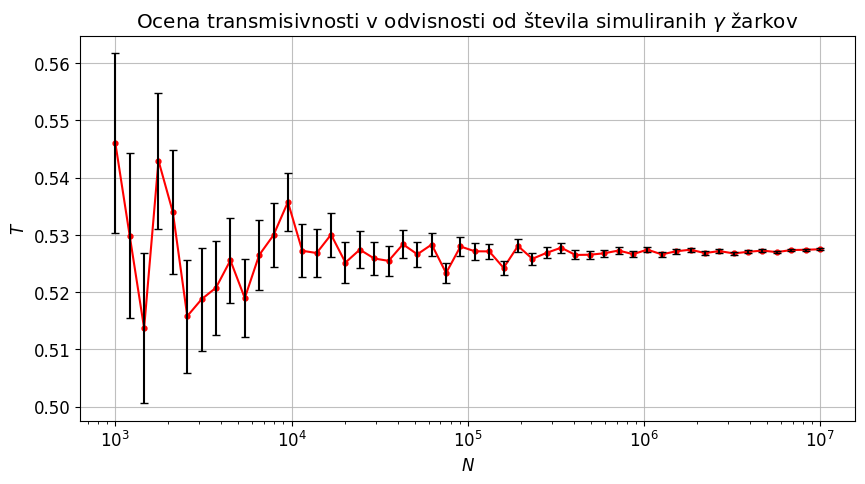

In [95]:
# Transmisivnost

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_xscale('log')
ax.set_title(r'Ocena transmisivnosti v odvisnosti od števila simuliranih $\gamma$ žarkov')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$T$')
ax.errorbar(num_samples, ts, yerr=ts_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='red')

print(ts[-1], ts_err[-1])

In [106]:
num_samples2 = int(10**7)

lams=np.arange(0.5, 10.1, 0.5)

ts_lam = np.zeros_like(lams, dtype=float)
ts_lam_err = np.zeros_like(lams, dtype=float)

for i, lam in enumerate(lams):
    print(i/len(lams))
    ts_lam[i], ts_lam_err[i] = estimate_transmissivity(num_samples2, lam=lam)

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


0.92794 0.0008177246260202758


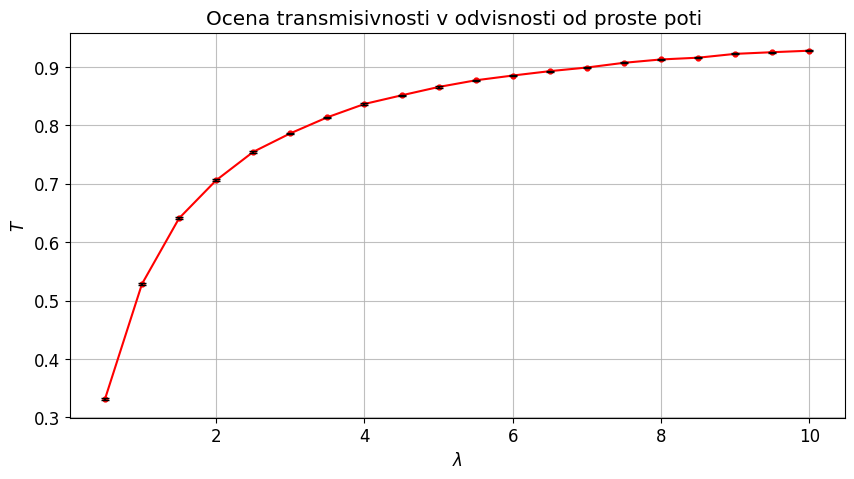

In [105]:
# Transmisivnost

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_title('Ocena transmisivnosti v odvisnosti od proste poti ')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$T$')
ax.errorbar(lams, ts_lam, yerr=ts_lam_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='red')

print(ts_lam[-1], ts_lam_err[-1])